# Capstone 1 - Part 1

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1LfquyGkEO45x35q8yvYzke8lswCfBu89/view?usp=sharing)
 
### Context & Problem statement:

This is a fictional data set that contains atmost 30 features of categorical and discreet data. These data are kind of both numerical and text values which help in analysing the employee data from hiring to firing and on boarding to attrition.  Dive into current available HR metrics to reduce the attrition rate and improve employee performance. Employee attrition has long been a significant worry for organizations due to the substantial investments of time, money, and effort in training new employees. When an employee departs, it results in overall losses for the company, including the cost of replacing and retraining, as well as disruptions in workflow. Moreover, attrition can erode trust among remaining employees, creating additional management challenges.

The HR Attrition dataset, albeit fictional, serves the purpose of identifying key factors that could play a pivotal role in determining which employees are more likely to leave the company and who is likely to stay. In this capstone, we delve into a thorough analysis of these influential factors and employ predictive modeling techniques to gain a deeper understanding, ultimately enabling us to make accurate predictions regarding employee attrition.

### Business use case:

- Brief overview of attrition within the organization
- Explore the main factors that lead to employee attrition
- Propose relevant contributors to Performance Ratings and calculate their correlations

### Goals/ Metrics:

- Identify top reasons for attrition and recommend further action steps to improve
- Point out key factors that drive employee performance

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features, and target variable (attrition)
- Understanding the context and significance of each feature in relation to employee attrition

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables (e.g., employee tenure, performance scores) and do Exploratory Data Analysis (EDA)
- Analyzing factors contributing to employee attrition (e.g., age, job role, salary, work environment)
- Visualizing attrition rates across different demographic and employment-related variables
- Identifying correlations and patterns in the data to understand attrition drivers
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc. 
- Make sure the plots are correctly labelled. 
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
df = pd.read_csv("HR-Analytics.csv")

In [3]:
# Display the first few rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# Get information about the dataset, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
# Check for missing values in each column
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
# Identify duplicated rows in the dataset
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


#### Looking at the above two cells, we confirm that there are no missingvalues and duplicate records in the data. We preceed with further analysis.

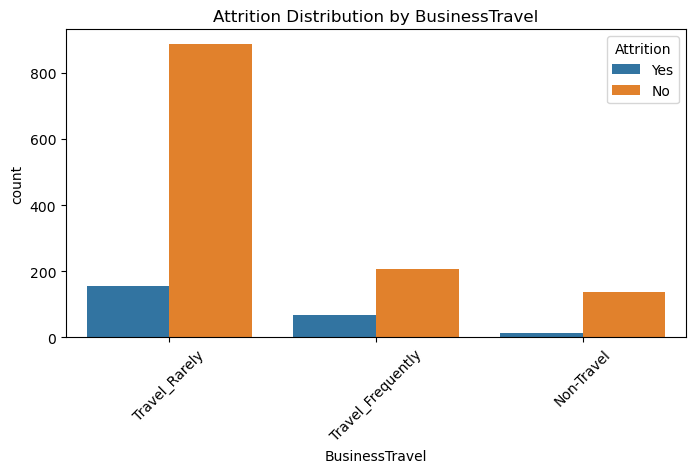

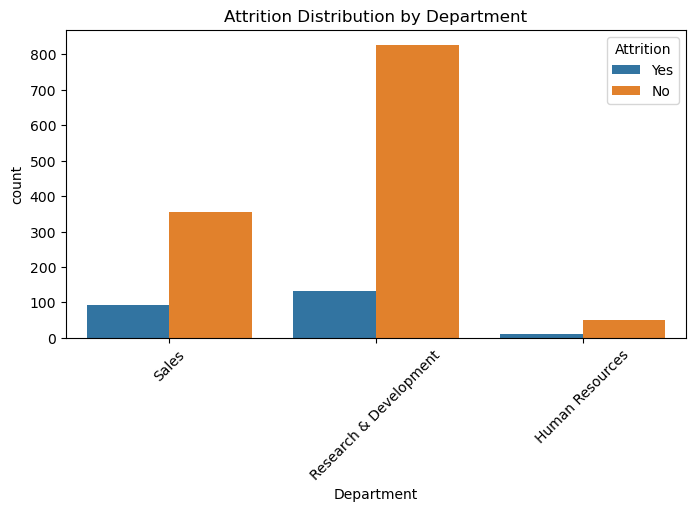

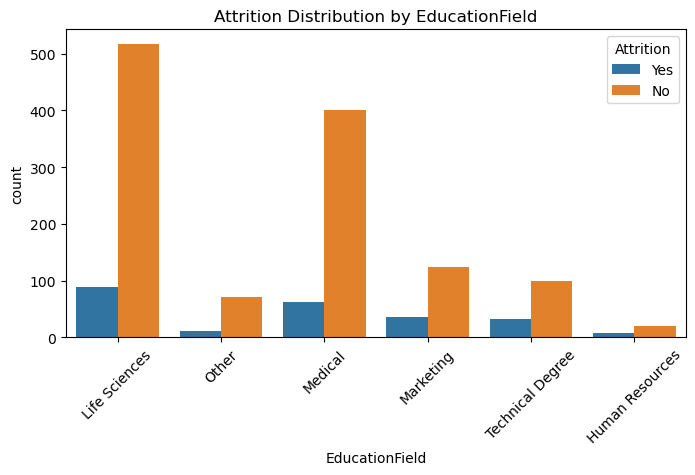

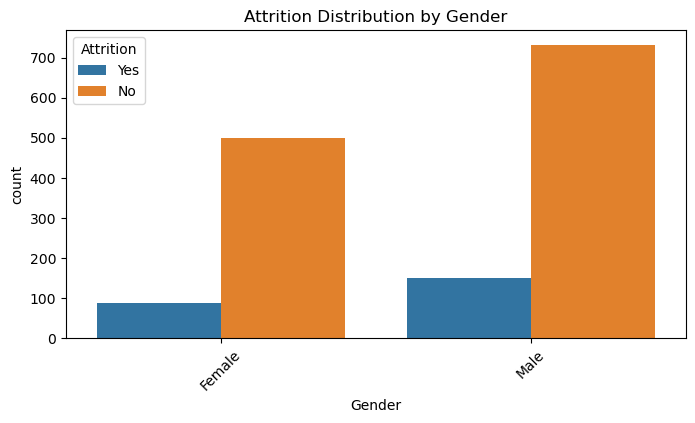

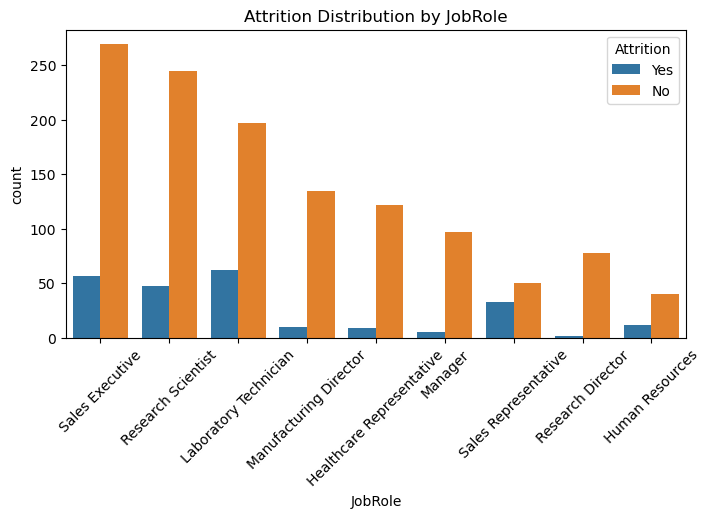

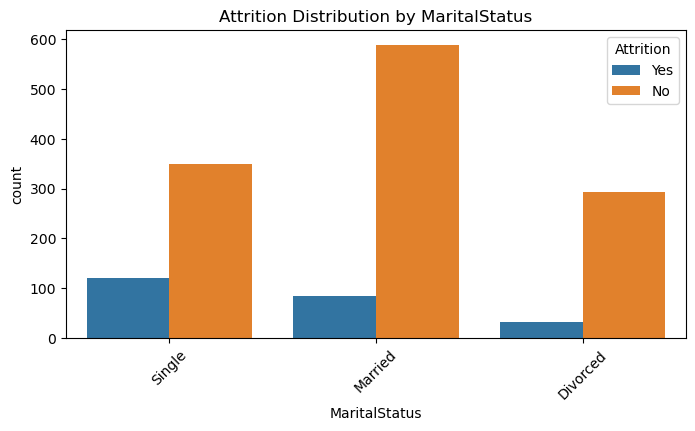

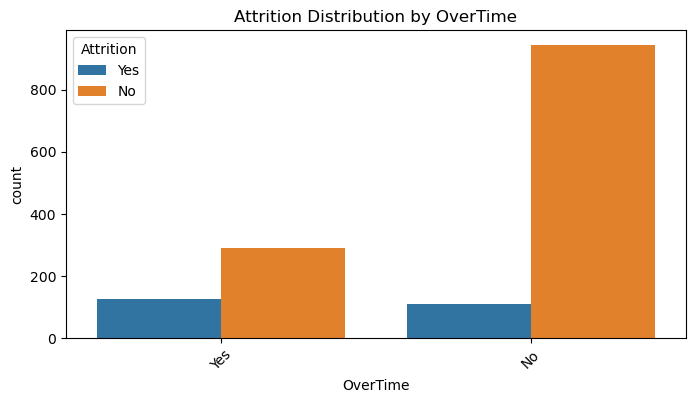

In [14]:
# Visualize the distribution of 'Attrition' across various categorical features
for col in ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue="Attrition", data=df)
    plt.title(f"Attrition Distribution by {col}")
    plt.xticks(rotation=45)
    plt.show()

#### The above plots show how attrition is distributed across various categorical columns. There is no obvious correlation that can be seen here.
#### We can see that employees who work overtime, who are single have high attrtion.

In [17]:
# Encode categorical variables using Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#### Tried to create new features to add insights to the analysis. Calculated features like employee tenure, income growth rate and worklife balance index.

In [20]:
# Feature Engineering: Create new features based on existing ones
df["EmployeeTenure"] = df["YearsAtCompany"] / (df["TotalWorkingYears"]+1)
df["Income_Growth_Rate"] = (df["PercentSalaryHike"] / (df["YearsAtCompany"] + 1)).round().astype(int)
df["Work_Life_Balance_Index"] = ((df["WorkLifeBalance"] + df["JobSatisfaction"] + 
                                  df["RelationshipSatisfaction"] + df["EnvironmentSatisfaction"]) / 4).round().astype(int)

In [22]:
# Display the shape of the dataset after adding new features
df.shape

(1470, 38)

In [24]:
# Bin Employee Tenure into categorical intervals for clear visualization
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ["0-2 years", "2-4 years", "4-6 Years", "6-8 Years", "8+ Years"]

df["Tenure_Bucket"] = pd.cut(df["EmployeeTenure"], bins=bins, labels=labels, right=False)

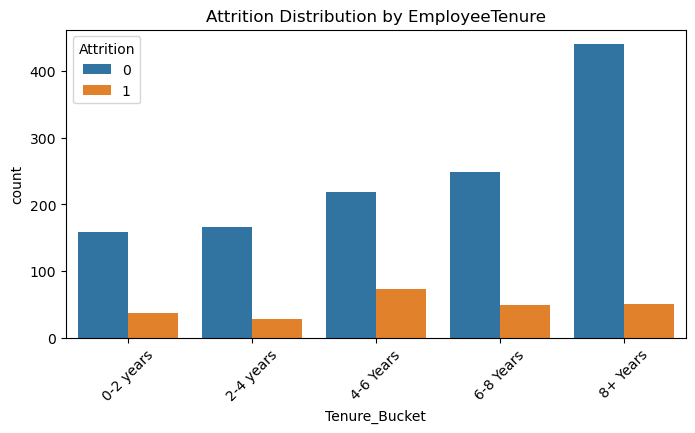

In [26]:
# Visualize the distribution of 'Attrition' across 'Tenure_Bucket'
plt.figure(figsize=(8, 4))
sns.countplot(x="Tenure_Bucket", hue="Attrition", data=df)
plt.title(f"Attrition Distribution by EmployeeTenure")
plt.xticks(rotation=45)
plt.show()

df = df.drop('Tenure_Bucket', axis=1)

#### There is high attrition in employees who spent moderate amount of time in the company.

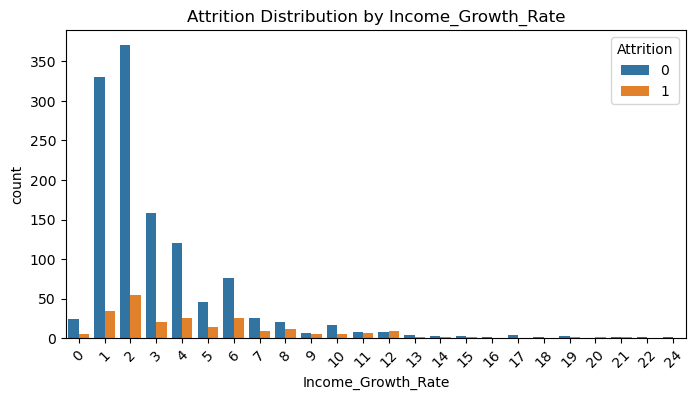

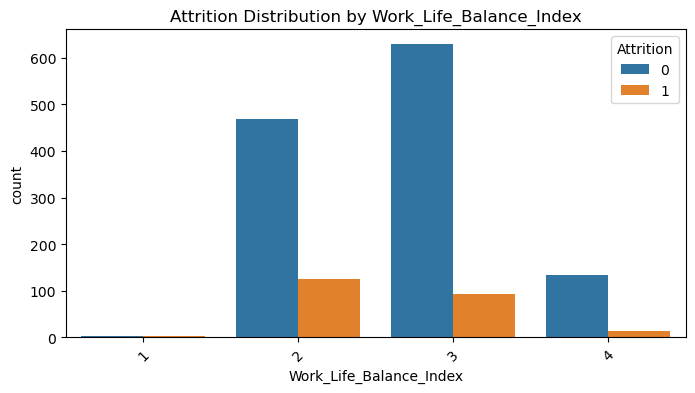

In [29]:
#Visualize the distribution of 'Attrition' across newly created features
for col in ['Income_Growth_Rate', 'Work_Life_Balance_Index']:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue="Attrition", data=df)
    plt.title(f"Attrition Distribution by {col}")
    plt.xticks(rotation=45)
    plt.show()

#### From the above plots we see that attrition is high in employees with low income growth rate and low work life balance index.

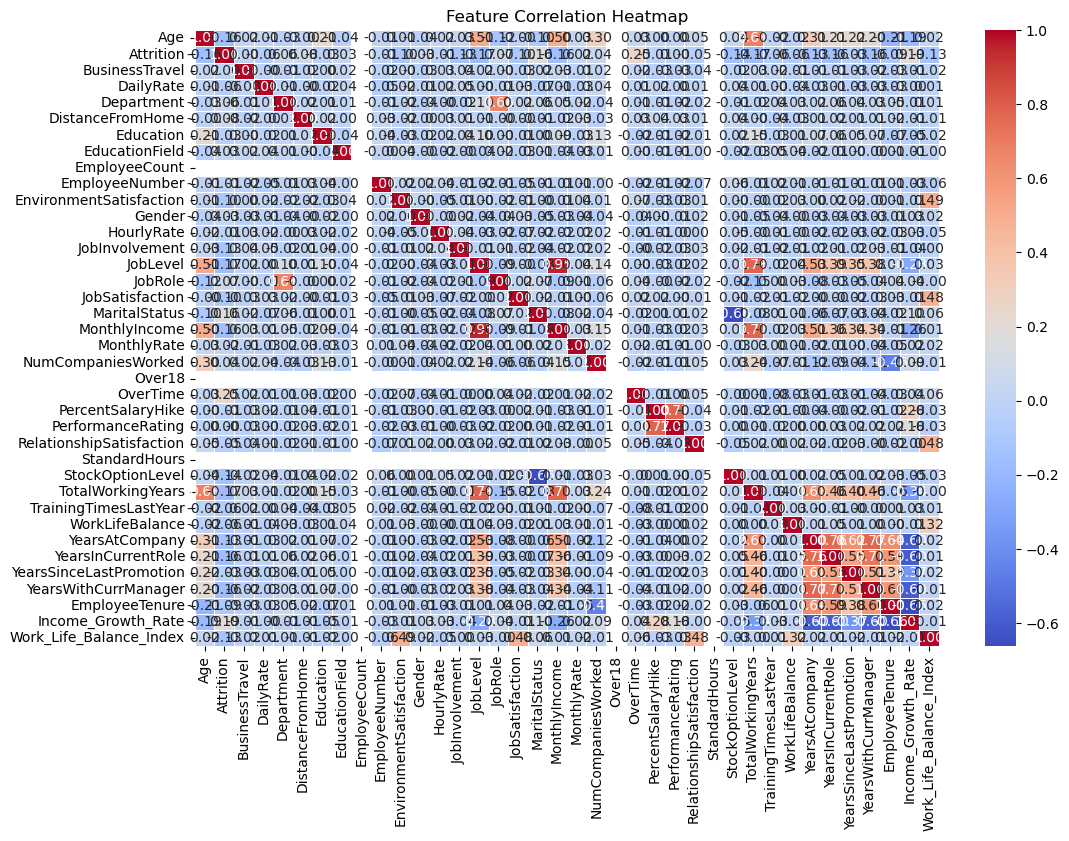

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeTenure,Income_Growth_Rate,Work_Life_Balance_Index
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.207687,-0.187638,0.022730
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,-0.092358,0.193945,-0.129642
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636,-0.033273,-0.006900,-0.017181
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.032285,-0.000691,0.010368
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282,0.045476,-0.008922,0.014067
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.018981,-0.005540,-0.014972
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.065529,-0.050130,-0.019514
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130,0.010389,-0.006364,-0.003802
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,0.013153,-0.031489,-0.056004


In [32]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

correlation_matrix

#### We see null values in EmployeeCount, Over18, StandardHours as there is a single entry in those columns. The variance is zero. So we can drop those columns as they don't add any value to the analysis.

In [35]:
# Check for unique values in the specified columns
print(df[['EmployeeCount', 'Over18', 'StandardHours']].nunique())

# Drop columns with a single unique value (zero variance)
df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])


EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64


In [37]:
# Display the correlation of each feature with 'Attrition'
correlation_with_attrition = df.corr()["Attrition"].sort_values(ascending=False)
print(correlation_with_attrition)

Attrition                   1.000000
OverTime                    0.246118
Income_Growth_Rate          0.193945
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EmployeeTenure             -0.092358
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
Work_Life_Balance_Index    -0.129642
JobInvolvement             -0.130016
Y

#### Positive correlations indicate that attrition increases.
##### OverTime - Employees who work overtime are more likely to leave.
##### Income_Growth_Rate - A higher percentage salary hike relative to tenure is associated with higher attrition.
##### MaritalStatus - Single employees leaving more often.
##### DistanceFromHome - Employees who live farther from work may have a slightly higher chance of leaving.

#### Weak or near-zero correlations indicate minimal effect on attrition.
##### BusinessTravel - No significant impact on attrition.
##### PerformanceRating - Performance ratings don’t strongly influence attrition.
##### HourlyRate - Hourly pay has little to no effect.

#### Negative correlations indicate attrition decreases.
##### TotalWorkingYears - More experienced employees are less likely to leave.
##### JobLevel - Higher job levels are associated with lower attrition.
##### MonthlyIncome - Employees earning more tend to stay.
##### WorkLifeBalance - Better work-life balance leads to lower attrition.
##### JobSatisfaction - Higher job satisfaction reduces attrition.
##### YearsWithCurrManager - Longer relationships with managers lower attrition.
##### StockOptionLevel - Employees with stock options are less likely to leave.

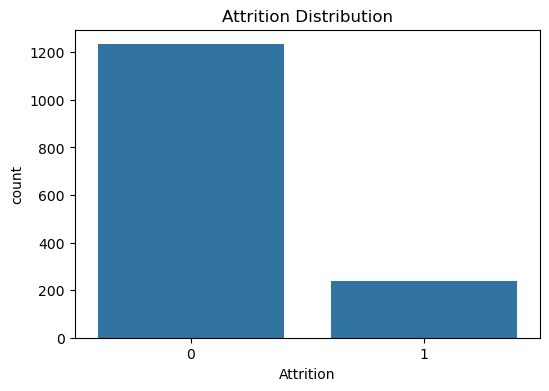

In [40]:
# Display the correlation of each feature with 'Attrition'
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

In [42]:
# Separate features and target 
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [44]:
# Address class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

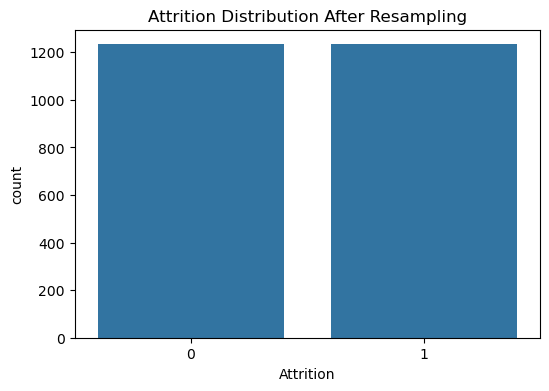

In [46]:
# Visualize the distribution of 'Attrition' after resampling
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled)
plt.title("Attrition Distribution After Resampling")
plt.show()

In [48]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Accuracy: 0.9109311740890689
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       250
           1       0.92      0.90      0.91       244

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494

                     Feature  Importance
23          StockOptionLevel    0.077278
16             MonthlyIncome    0.060737
11            JobInvolvement    0.050842
14           JobSatisfaction    0.042710
31            EmployeeTenure    0.041870
33   Work_Life_Balance_Index    0.039405
17               MonthlyRate    0.038161
4           DistanceFromHome    0.038033
24         TotalWorkingYears    0.036887
8    EnvironmentSatisfaction    0.036605
7             EmployeeNumber    0.035910
30      YearsWithCurrManager    0.035015
0                        Age    0.034050
2                  DailyRate    0.033332
12                  JobLevel 

#### Most Important Features 
StockOptionLevel - Employees with stock options are more likely to stay, making this the most influential feature.
MonthlyIncome - Higher income is linked to lower attrition.
JobSatisfaction - Higher satisfaction leads to lower attrition.
Work_Life_Balance_Index - Employees with better work-life balance are less likely to leave.
YearsWithCurrManager - Employees who have worked longer with the same manager tend to stay.

#### Moderately Important Features
JobInvolvement - Employees more involved in their jobs are less likely to leave.
YearsInCurrentRole - Employees who have been in the same role for a long time may be less likely to leave.
EnvironmentSatisfaction - A positive work environment reduces attrition.
TotalWorkingYears & Age - More experienced and older employees tend to stay.

#### Low-Importance Features 
OverTime - Surprisingly low, even though correlation suggested a stronger link.
EmployeeTenure - Not as significant as expected.
Gender & MaritalStatus - Minimal influence on attrition.


#### From the above analysis we can conclude that to reduce attrition, companty needs to focus on competitive pay, stock options, career growth, and work-life balance. 